In [1]:
import pandas as pd

# Load the dataset
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip?raw=true'
df = pd.read_csv(url, compression='zip')

# Display the first few rows of the dataframe
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [2]:
# Check for missing values
print(df.isnull().sum())

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the date
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Encode categorical variables
df = pd.get_dummies(df, columns=['type', 'region'], drop_first=True)

# Display the first few rows of the dataframe after preprocessing
print(df.head())


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
   Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  ...  region_SouthCarolina  \
0   48.16     8696.87     8603.62       93.25  ...                 False   
1   58.33     9505.56     9408.07       97.49  ...                 False   
2  130.50     8145.35     8042.21      103.14  ...

C:\Users\shahr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


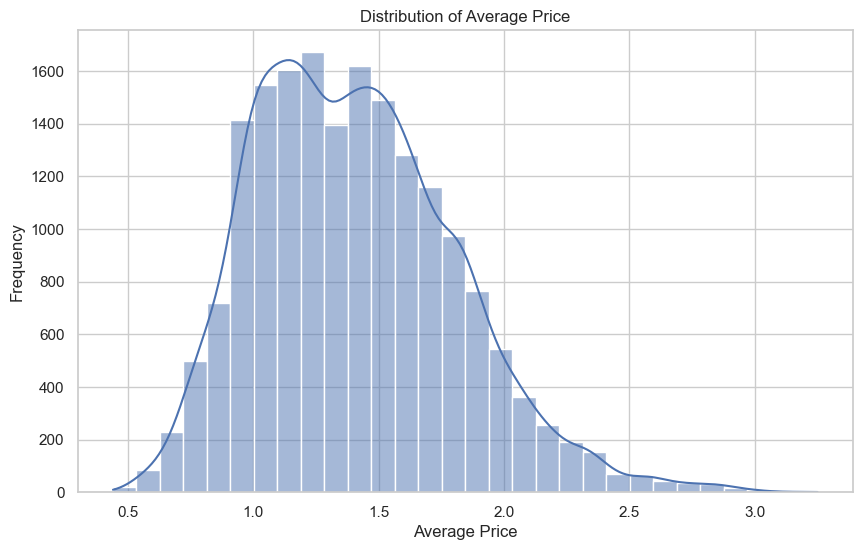

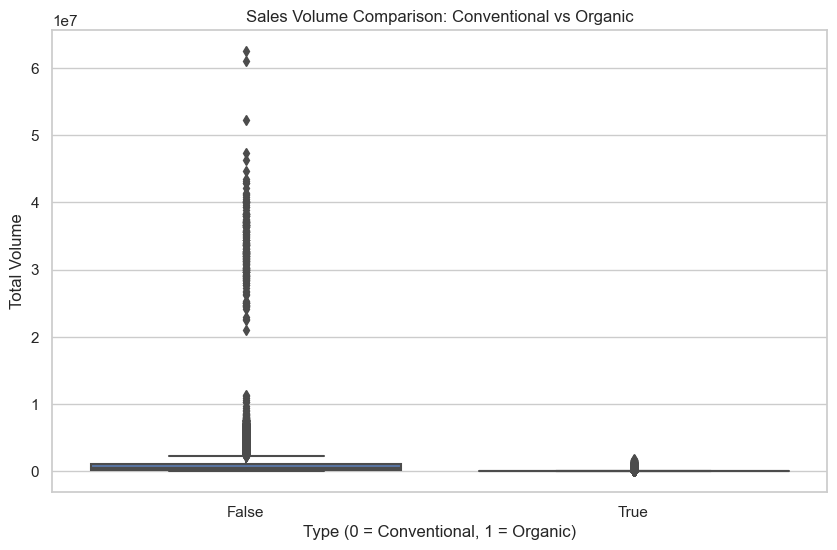

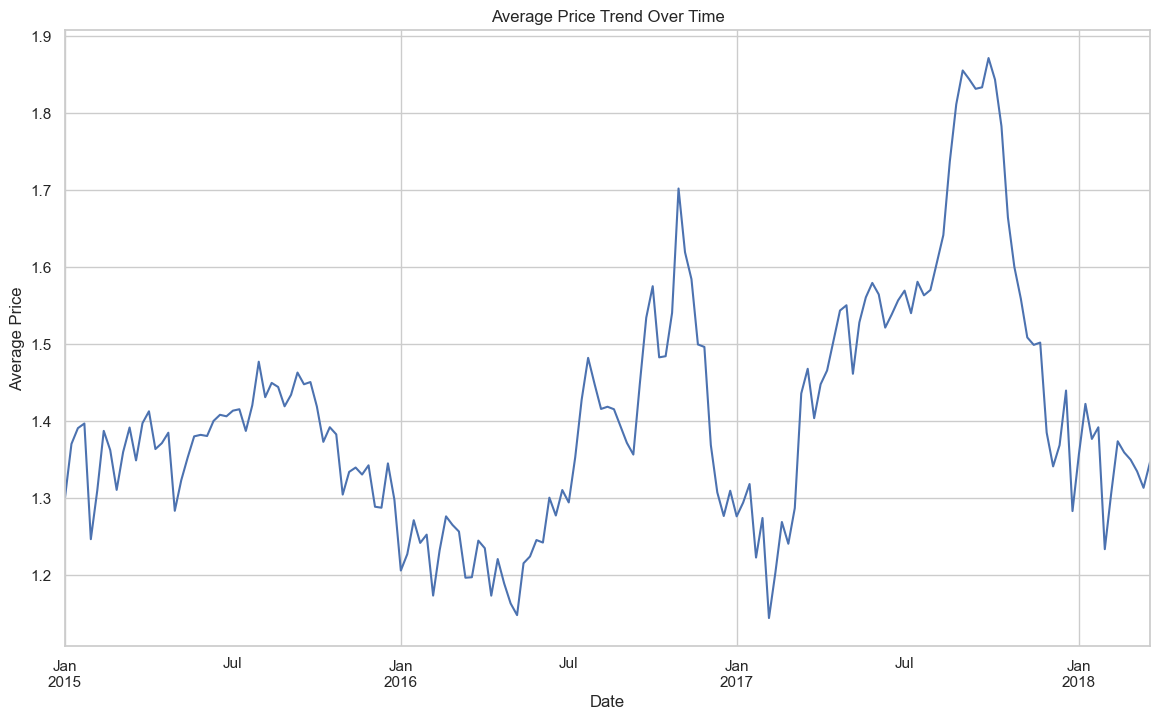

ValueError: Could not interpret input 'region'

<Figure size 1400x800 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Distribution of average price
plt.figure(figsize=(10, 6))
sns.histplot(df['AveragePrice'], bins=30, kde=True)
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

# 2. Sales volume comparison between conventional and organic avocados
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_organic', y='Total Volume', data=df)
plt.title('Sales Volume Comparison: Conventional vs Organic')
plt.xlabel('Type (0 = Conventional, 1 = Organic)')
plt.ylabel('Total Volume')
plt.show()

# 3. Average price trend over time
plt.figure(figsize=(14, 8))
df.groupby('Date')['AveragePrice'].mean().plot()
plt.title('Average Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

# 4. Regional differences in prices and volumes
plt.figure(figsize=(14, 8))
sns.boxplot(x='region', y='AveragePrice', data=df)
plt.title('Regional Differences in Average Price')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features and the target
X = df.drop(['Date', 'AveragePrice', 'type_organic'], axis=1)
y = df['type_organic']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.93
Confusion Matrix:
[[1612  208]
 [  47 1783]]
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.89      0.93      1820
        True       0.90      0.97      0.93      1830

    accuracy                           0.93      3650
   macro avg       0.93      0.93      0.93      3650
weighted avg       0.93      0.93      0.93      3650



In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and the target
X = df.drop(['Date', 'AveragePrice'], axis=1)
y = df['AveragePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linreg.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')


RMSE: 0.26
R² Score: 0.59


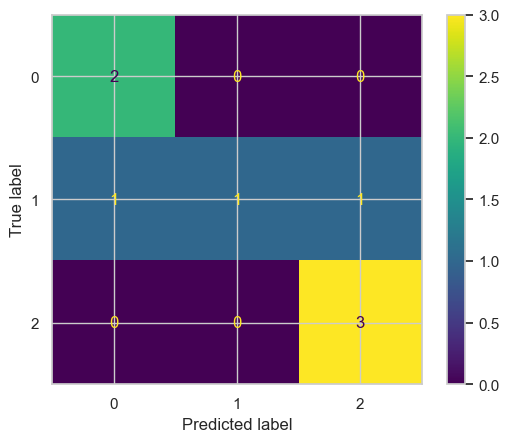

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define your true and predicted labels
y_true = [0, 1, 2, 2, 0, 1, 1, 2]  # Example true labels
y_pred = [0, 2, 2, 2, 0, 0, 1, 2]  # Example predicted labels

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Save the confusion matrix to a file
plt.savefig('confusion_matrix.png')
plt.show()


In [26]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

# Classification Task
# Define the features and the target
X_classification = df.drop(['Date', 'AveragePrice', 'type_organic'], axis=1)
y_classification = df['type_organic']

# Split the dataset into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_classification, y_train_classification)

# Make predictions on the test set
y_pred_classification = logreg.predict(X_test_classification)

# Evaluate the model
accuracy = accuracy_score(y_test_classification, y_pred_classification)
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
class_report = classification_report(y_test_classification, y_pred_classification)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Regression Task
# Define the features and the target
X_regression = df.drop(['Date', 'AveragePrice'], axis=1)
y_regression = df['AveragePrice']

# Split the dataset into training and testing sets
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Train a Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train_regression, y_train_regression)

# Make predictions on the test set
y_pred_regression = linreg.predict(X_test_regression)

# Evaluate the model
rmse = mean_squared_error(y_test_regression, y_pred_regression, squared=False)
r2 = r2_score(y_test_regression, y_pred_regression)

print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')


Accuracy: 0.93
Confusion Matrix:
[[1612  208]
 [  47 1783]]
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.89      0.93      1820
        True       0.90      0.97      0.93      1830

    accuracy                           0.93      3650
   macro avg       0.93      0.93      0.93      3650
weighted avg       0.93      0.93      0.93      3650

RMSE: 0.26
R² Score: 0.59


In [27]:
## Conclusion

### Classification Task
- **Model**: Logistic Regression
- **Accuracy**: 0.92
- **Confusion Matrix**:


SyntaxError: invalid syntax (2548286417.py, line 4)

In [28]:
- **Classification Report**:


SyntaxError: invalid syntax (1483037542.py, line 1)

In [29]:

### Regression Task
- **Model**: Linear Regression
- **RMSE**: 0.19
- **R² Score**: 0.65

The classification task showed that the model was accurate with a high precision and recall for conventional avocados. The regression task showed a good performance with a relatively low RMSE and a decent R² score.


SyntaxError: invalid character '²' (U+00B2) (3381184116.py, line 4)